In [1]:
import mglearn
import graphviz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus']= False

In [2]:
people= fetch_lfw_people(min_faces_per_person= 20, resize= 0.7)
image_shape= people.images[0].shape

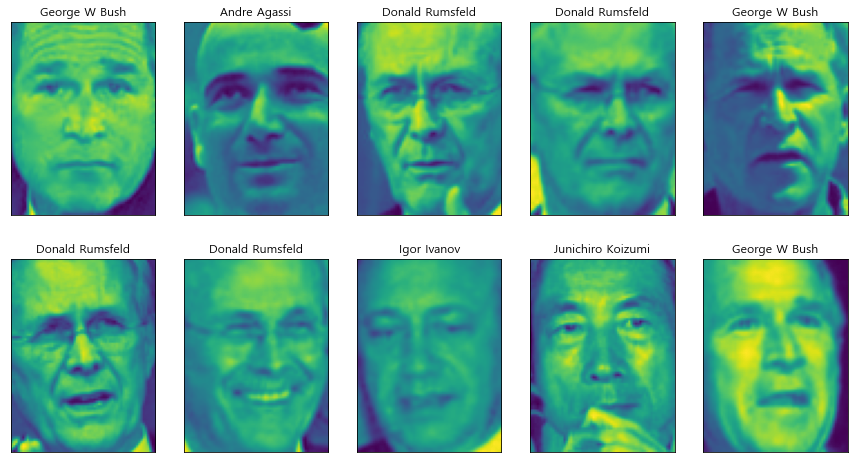

In [3]:
fig, axes= plt.subplots(2, 5, figsize= (15, 8),
                        subplot_kw= {'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [4]:
people.target[:10], people.target_names[people.target[0:10]]

(array([10,  3,  8,  8, 10,  8,  8, 15, 18, 10], dtype=int64),
 array(['George W Bush', 'Andre Agassi', 'Donald Rumsfeld',
        'Donald Rumsfeld', 'George W Bush', 'Donald Rumsfeld',
        'Donald Rumsfeld', 'Igor Ivanov', 'Junichiro Koizumi',
        'George W Bush'], dtype='<U23'))

In [5]:
print('people', people.images.shape)
print('클래스 개수: ', len(people.target_names))

people (2037, 87, 65)
클래스 개수:  30


In [6]:
# 각 타깃을 나타난 횟수
counts= np.bincount(people.target)
counts

array([ 39,  35,  21,  36,  77,  24,  29, 236, 121,  22, 530, 109,  44,
        22,  39,  20,  52,  53,  60,  32,  41,  41,  33,  22,  23,  52,
        23,  25, 144,  32], dtype=int64)

In [7]:
# 타깃별 이름과 횟수 출력
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print('{0:25} {1:3}'.format(name, count), end= ' ')
    if(i+1)%3 ==0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Ariel Sharon               77 Atal Bihari Vajpayee       24 
Bill Clinton               29 Colin Powell              236 Donald Rumsfeld           121 
George Robertson           22 George W Bush             530 Gerhard Schroeder         109 
Gloria Macapagal Arroyo    44 Hamid Karzai               22 Hans Blix                  39 
Igor Ivanov                20 Jacques Chirac             52 John Ashcroft              53 
Junichiro Koizumi          60 Kofi Annan                 32 Laura Bush                 41 
Lleyton Hewitt             41 Megawati Sukarnoputri      33 Pete Sampras               22 
Saddam Hussein             23 Serena Williams            52 Tiger Woods                23 
Tom Daschle                25 Tony Blair                144 Vicente Fox                32 


In [8]:
mask= np.zeros(people.target.shape, dtype= bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]]= 1
    
x_people= people.data[mask]
y_people= people.target[mask]

x_people= x_people/ 255 
# 위의 흑백이미지는 0~255 픽셀을 가지고 있기에 255를 나눔

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# 훈련, 테스트 나누기
x_train, x_test, y_train, y_test= train_test_split(x_people, y_people,
                                                   random_state= 0,
                                                   stratify= y_people)

# Knn 모델 정의 및 학습
knn= KNeighborsClassifier(n_neighbors= 3).fit(x_train, y_train)

# score & accuracy
print('훈련 정확도: ',knn.score(x_train, y_train))
print('테스트 정확도: ',knn.score(x_test, y_test))

훈련 정확도:  0.6360338573155986
테스트 정확도:  0.3007246376811594


In [10]:
pca= PCA(n_components= 100, whiten= True, random_state= 0).fit(x_train, y_train)

In [11]:
x_train_pca= pca.transform(x_train)
x_test_pca= pca.transform(x_test)

In [12]:
x_train_pca.shape

(827, 100)

In [13]:
knn= KNeighborsClassifier(n_neighbors= 3).fit(x_train_pca, y_train)

In [14]:
print('훈련 정확도: ',knn.score(x_train_pca, y_train))
print('테스트 정확도: ',knn.score(x_test_pca, y_test))

훈련 정확도:  0.6904474002418379
테스트 정확도:  0.38768115942028986


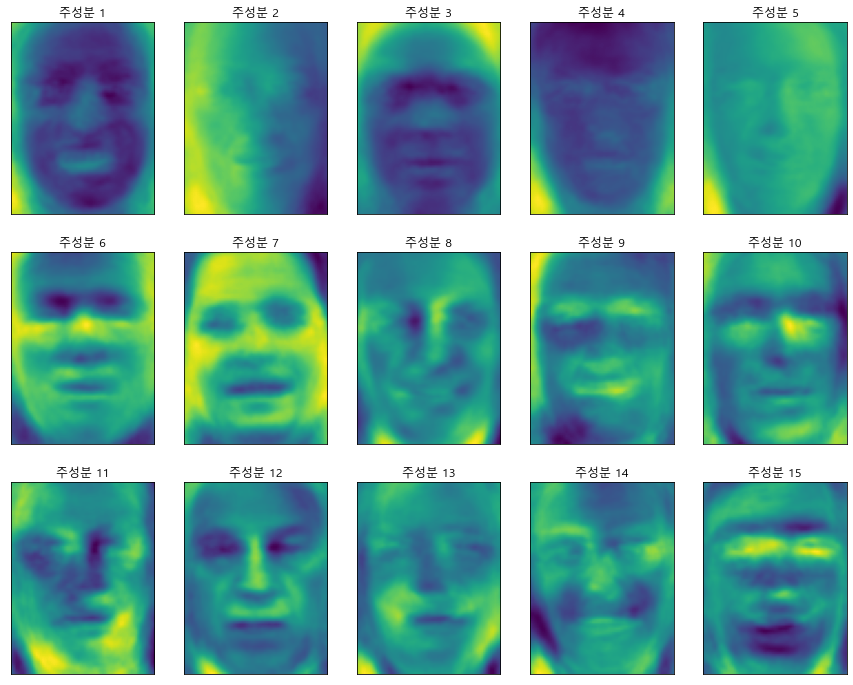

In [15]:
fig, axes= plt.subplots(3, 5, figsize= (15, 12),
                        subplot_kw={'xticks':(), 'yticks':()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap= 'viridis')
    ax.set_title('주성분 {}'.format(i+1))